<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://tpq.io' target='_blank'>http://tpq.io</a>

**Contact us** | <a href='mailto:pff@tpq.io'>pff@tpq.io</a>

# Introductory Examples

In [1]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'
import warnings; warnings.simplefilter('ignore')

## Implied Volatilities

In [2]:
V0 = 17.6639

In [3]:
r = 0.01

In [4]:
import pandas as pd
h5 = pd.HDFStore('./source/vstoxx_data_31032014.h5', 'r')
futures_data = h5['futures_data']  # VSTOXX futures data
options_data = h5['options_data']  # VSTOXX call option data
h5.close()

In [9]:
futures_data.head()

,DATE,EXP_YEAR,EXP_MONTH,PRICE,MATURITY,TTM
496,1396224000000000000,2014,4,17.85,1397779200000000000,0.049
497,1396224000000000000,2014,5,19.55,1400198400000000000,0.126
498,1396224000000000000,2014,6,19.95,1403222400000000000,0.222
499,1396224000000000000,2014,7,20.40,1405641600000000000,0.299
500,1396224000000000000,2014,8,20.70,1408060800000000000,0.375


In [10]:
options_data.head()

,DATE,EXP_YEAR,EXP_MONTH,TYPE,STRIKE,PRICE,MATURITY,TTM
46170,1396224000000000000,2014,4,C,1.0,16.85,1397779200000000000,0.049
46171,1396224000000000000,2014,4,C,2.0,15.85,1397779200000000000,0.049
46172,1396224000000000000,2014,4,C,3.0,14.85,1397779200000000000,0.049
46173,1396224000000000000,2014,4,C,4.0,13.85,1397779200000000000,0.049
46174,1396224000000000000,2014,4,C,5.0,12.85,1397779200000000000,0.049


In [11]:
import datetime as dt

In [12]:
futures_data['DATE'] = futures_data['DATE'].apply(lambda x: dt.datetime.fromtimestamp(x / 1e9))

In [13]:
futures_data['MATURITY'] = futures_data['MATURITY'].apply(lambda x: dt.datetime.fromtimestamp(x / 1e9))

In [14]:
futures_data

,DATE,EXP_YEAR,EXP_MONTH,PRICE,MATURITY,TTM
496,2014-03-30 19:00:00,2014,4,17.85,2014-04-17 19:00:00,0.049
497,2014-03-30 19:00:00,2014,5,19.55,2014-05-15 19:00:00,0.126
498,2014-03-30 19:00:00,2014,6,19.95,2014-06-19 19:00:00,0.222
499,2014-03-30 19:00:00,2014,7,20.40,2014-07-17 19:00:00,0.299
500,2014-03-30 19:00:00,2014,8,20.70,2014-08-14 19:00:00,0.375
501,2014-03-30 19:00:00,2014,9,20.95,2014-09-18 19:00:00,0.471
502,2014-03-30 19:00:00,2014,10,21.05,2014-10-16 19:00:00,0.548
503,2014-03-30 19:00:00,2014,11,21.25,2014-11-20 18:00:00,0.644


In [15]:
options_data['DATE'] = options_data['DATE'].apply(lambda x: dt.datetime.fromtimestamp(x / 1e9))

In [16]:
options_data['MATURITY'] = options_data['MATURITY'].apply(lambda x: dt.datetime.fromtimestamp(x / 1e9))

In [17]:
options_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 46170 to 46564
Data columns (total 8 columns):
DATE         395 non-null datetime64[ns]
EXP_YEAR     395 non-null int64
EXP_MONTH    395 non-null int64
TYPE         395 non-null object
STRIKE       395 non-null float64
PRICE        395 non-null float64
MATURITY     395 non-null datetime64[ns]
TTM          395 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(1)
memory usage: 27.8+ KB


In [18]:
options_data[['DATE', 'MATURITY', 'TTM', 'STRIKE', 'PRICE']].head()

,DATE,MATURITY,TTM,STRIKE,PRICE
46170,2014-03-30 19:00:00,2014-04-17 19:00:00,0.049,1.0,16.85
46171,2014-03-30 19:00:00,2014-04-17 19:00:00,0.049,2.0,15.85
46172,2014-03-30 19:00:00,2014-04-17 19:00:00,0.049,3.0,14.85
46173,2014-03-30 19:00:00,2014-04-17 19:00:00,0.049,4.0,13.85
46174,2014-03-30 19:00:00,2014-04-17 19:00:00,0.049,5.0,12.85


In [19]:
options_data['IMP_VOL'] = 0.0
  # new column for implied volatilities

In [20]:
from bsm_functions import *

In [48]:
tol = 0.5  # tolerance level for moneyness
for option in options_data.index:
    # iterating over all option quotes
    forward = futures_data[futures_data['MATURITY'] == \
                options_data.loc[option]['MATURITY']]['PRICE'].values[0]
      # picking the right futures value
    if (forward * (1 - tol) < options_data.loc[option]['STRIKE']
                             < forward * (1 + tol)):
        # only for options with moneyness within tolerance
        imp_vol = bsm_call_imp_vol(
                V0,  # VSTOXX value 
                options_data.loc[option]['STRIKE'],
                options_data.loc[option]['TTM'],
                r,   # short rate
                options_data.loc[option]['PRICE'],
                sigma_est=2.,  # estimate for implied volatility
                it=100)
        options_data.ix[option, 'IMP_VOL'] = imp_vol

In [44]:
print("123",end )

NameError: name 'end' is not defined

In [50]:
bsm_call_value(V0,10,0.049,r,1.80419)

7.8499988283269886

In [49]:
options_data.loc[46179]

DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                      4
TYPE                           C
STRIKE                        10
PRICE                       7.85
MATURITY     2014-04-17 19:00:00
TTM                        0.049
IMP_VOL                  1.80419
Name: 46179, dtype: object

In [44]:
print("123",end )

NameError: name 'end' is not defined

In [52]:
## ss
tol = 0.5  # tolerance level for moneyness
for option in options_data.index:
    # iterating over all option quotes
    forward = futures_data[futures_data['MATURITY'] == \
                options_data.loc[option]['MATURITY']]['PRICE'].values[0]
      # picking the right futures value
    if (forward * (1 - tol) < options_data.loc[option]['STRIKE']
                             < forward * (1 + tol)):
        # only for options with moneyness within tolerance
        ## ss grab bsm_call_imp_vol from bsm_functions.py
        sigma_est = 2
        for i in range(90):
            sigma_est -= ((bsm_call_value(V0, 
                                        options_data.loc[option]['STRIKE'],
                                        options_data.loc[option]['TTM'],
                                        r,   # short rate
                                        sigma_est) - options_data.loc[option]['PRICE'])
                        / bsm_vega(V0,
                                        options_data.loc[option]['STRIKE'],
                                        options_data.loc[option]['TTM'],
                                        r,   # short rate
                                        sigma_est)) 
            if (i % 30 ==0):
                print(sigma_est)
        options_data.ix[option, 'IMP_VOL'] = sigma_est 
        print(options_data.loc[option]); print()

2.08729534935
2.08338847632
2.08338847632
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                      4
TYPE                           C
STRIKE                         9
PRICE                       8.85
MATURITY     2014-04-17 19:00:00
TTM                        0.049
IMP_VOL                  2.08339
Name: 46178, dtype: object

1.82033493025
1.80419281487
1.80419281487
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                      4
TYPE                           C
STRIKE                        10
PRICE                       7.85
MATURITY     2014-04-17 19:00:00
TTM                        0.049
IMP_VOL                  1.80419
Name: 46179, dtype: object

1.61511091418
1.55028304066
1.55028304066
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                      4
TYPE                           C
STRIKE                        11
PRICE                       6.85
MATURITY     2014-04-17 19

1.13979385675
1.15312713366
1.15312713366
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                      5
TYPE                           C
STRIKE                        16
PRICE                       3.65
MATURITY     2014-05-15 19:00:00
TTM                        0.126
IMP_VOL                  1.15313
Name: 46234, dtype: object

1.01941598423
1.04266295264
1.04266295264
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                      5
TYPE                           C
STRIKE                        17
PRICE                        2.9
MATURITY     2014-05-15 19:00:00
TTM                        0.126
IMP_VOL                  1.04266
Name: 46235, dtype: object

0.970782942393
0.997287043898
0.997287043898
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                      5
TYPE                           C
STRIKE                        18
PRICE                       2.35
MATURITY     2014-05-15

0.863944356573
0.863944356573
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                      6
TYPE                           C
STRIKE                        19
PRICE                       2.35
MATURITY     2014-06-19 19:00:00
TTM                        0.222
IMP_VOL                 0.863944
Name: 46286, dtype: object

0.810600547861
0.857610911927
0.857610911927
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                      6
TYPE                           C
STRIKE                        20
PRICE                          2
MATURITY     2014-06-19 19:00:00
TTM                        0.222
IMP_VOL                 0.857611
Name: 46287, dtype: object

0.818852375439
0.853161741531
0.853161741531
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                      6
TYPE                           C
STRIKE                        21
PRICE                        1.7
MATURITY     2014-06-19 19:00:00

0.82104963152
0.82104963152
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                      7
TYPE                           C
STRIKE                        23
PRICE                       1.55
MATURITY     2014-07-17 19:00:00
TTM                        0.299
IMP_VOL                  0.82105
Name: 46339, dtype: object

0.814743514154
0.834280250973
0.834280250973
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                      7
TYPE                           C
STRIKE                        24
PRICE                        1.4
MATURITY     2014-07-17 19:00:00
TTM                        0.299
IMP_VOL                  0.83428
Name: 46340, dtype: object

0.825508828637
0.826374462616
0.826374462616
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                      7
TYPE                           C
STRIKE                        25
PRICE                        1.2
MATURITY     2014-07-17 19:00:00
T

0.818940290344
0.818940290344
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                      8
TYPE                           C
STRIKE                        26
PRICE                       1.35
MATURITY     2014-08-14 19:00:00
TTM                        0.375
IMP_VOL                  0.81894
Name: 46391, dtype: object

0.812379040526
0.817814400708
0.817814400708
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                      8
TYPE                           C
STRIKE                        27
PRICE                        1.2
MATURITY     2014-08-14 19:00:00
TTM                        0.375
IMP_VOL                 0.817814
Name: 46392, dtype: object

0.836864206554
0.826291497109
0.826291497109
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                      8
TYPE                           C
STRIKE                        28
PRICE                        1.1
MATURITY     2014-08-14 19:00:00

Name: 46443, dtype: object

0.771836924681
0.792648570192
0.792648570192
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                      9
TYPE                           C
STRIKE                        29
PRICE                        1.2
MATURITY     2014-09-18 19:00:00
TTM                        0.471
IMP_VOL                 0.792649
Name: 46444, dtype: object

0.791069643051
0.79616577256
0.79616577256
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                      9
TYPE                           C
STRIKE                        30
PRICE                        1.1
MATURITY     2014-09-18 19:00:00
TTM                        0.471
IMP_VOL                 0.796166
Name: 46445, dtype: object

1.53649376966
1.55540778173
1.55540778173
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                     10
TYPE                           C
STRIKE                        11
PRICE                      

1.20006325385
1.20006325385
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                     11
TYPE                           C
STRIKE                        13
PRICE                        8.3
MATURITY     2014-11-20 18:00:00
TTM                        0.644
IMP_VOL                  1.20006
Name: 46528, dtype: object

0.977374613407
1.09005665847
1.09005665847
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                     11
TYPE                           C
STRIKE                        14
PRICE                        7.4
MATURITY     2014-11-20 18:00:00
TTM                        0.644
IMP_VOL                  1.09006
Name: 46529, dtype: object

0.85666234162
0.99704137731
0.99704137731
DATE         2014-03-30 19:00:00
EXP_YEAR                    2014
EXP_MONTH                     11
TYPE                           C
STRIKE                        15
PRICE                       6.55
MATURITY     2014-11-20 18:00:00
TTM   

In [16]:
futures_data['MATURITY']
  # select the column with name MATURITY

496   2014-04-18 02:00:00
497   2014-05-16 02:00:00
498   2014-06-20 02:00:00
499   2014-07-18 02:00:00
500   2014-08-15 02:00:00
501   2014-09-19 02:00:00
502   2014-10-17 02:00:00
503   2014-11-21 01:00:00
Name: MATURITY, dtype: datetime64[ns]

In [17]:
options_data.loc[46170]
  # select data row for index 46170

DATE         2014-03-31 02:00:00
EXP_YEAR                    2014
EXP_MONTH                      4
TYPE                           C
STRIKE                         1
PRICE                      16.85
MATURITY     2014-04-18 02:00:00
TTM                        0.049
IMP_VOL                        0
Name: 46170, dtype: object

In [18]:
options_data.loc[46170]['STRIKE']
  # select only the value in column STRIKE
  # for index 46170 

1.0

In [54]:
## ss
options_data.head()

,DATE,EXP_YEAR,EXP_MONTH,TYPE,STRIKE,PRICE,MATURITY,TTM,IMP_VOL
46170,2014-03-30 19:00:00,2014,4,C,1.0,16.85,2014-04-17 19:00:00,0.049,0.0
46171,2014-03-30 19:00:00,2014,4,C,2.0,15.85,2014-04-17 19:00:00,0.049,0.0
46172,2014-03-30 19:00:00,2014,4,C,3.0,14.85,2014-04-17 19:00:00,0.049,0.0
46173,2014-03-30 19:00:00,2014,4,C,4.0,13.85,2014-04-17 19:00:00,0.049,0.0
46174,2014-03-30 19:00:00,2014,4,C,5.0,12.85,2014-04-17 19:00:00,0.049,0.0


In [55]:
plot_data = options_data[options_data['IMP_VOL'] > 0]

In [56]:
#ss
plot_data.head()

,DATE,EXP_YEAR,EXP_MONTH,TYPE,STRIKE,PRICE,MATURITY,TTM,IMP_VOL
46178,2014-03-30 19:00:00,2014,4,C,9.0,8.85,2014-04-17 19:00:00,0.049,2.083388
46179,2014-03-30 19:00:00,2014,4,C,10.0,7.85,2014-04-17 19:00:00,0.049,1.804193
46180,2014-03-30 19:00:00,2014,4,C,11.0,6.85,2014-04-17 19:00:00,0.049,1.550283
46181,2014-03-30 19:00:00,2014,4,C,12.0,5.85,2014-04-17 19:00:00,0.049,1.316103
46182,2014-03-30 19:00:00,2014,4,C,13.0,4.85,2014-04-17 19:00:00,0.049,1.097184


In [57]:
maturities = sorted(set(options_data['MATURITY']))
maturities

[Timestamp('2014-04-17 19:00:00'),
 Timestamp('2014-05-15 19:00:00'),
 Timestamp('2014-06-19 19:00:00'),
 Timestamp('2014-07-17 19:00:00'),
 Timestamp('2014-08-14 19:00:00'),
 Timestamp('2014-09-18 19:00:00'),
 Timestamp('2014-10-16 19:00:00'),
 Timestamp('2014-11-20 18:00:00')]

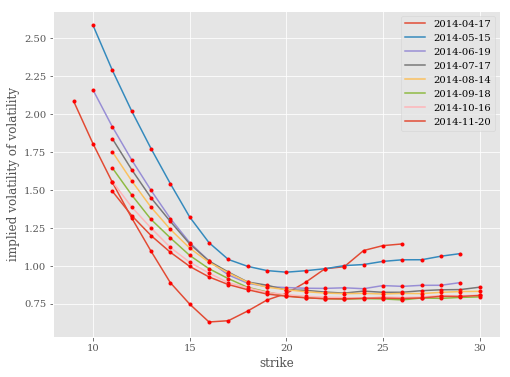

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8, 6))
for maturity in maturities:
    data = plot_data[options_data.MATURITY == maturity]
      # select data for this maturity
    plt.plot(data['STRIKE'], data['IMP_VOL'],
             label=maturity.date(), lw=1.5)
    plt.plot(data['STRIKE'], data['IMP_VOL'], 'r.', label='')
plt.grid(True) 
plt.xlabel('strike')
plt.ylabel('implied volatility of volatility')
plt.legend()
plt.show()
# tag: vs_imp_vol
# title: Implied volatilities (of volatility) for European call options on the VSTOXX on 31. March 2014

In [59]:
keep = ['PRICE', 'IMP_VOL']
group_data = plot_data.groupby(['MATURITY', 'STRIKE'])[keep]
group_data

In [23]:
group_data = group_data.sum()
group_data.head()

PRICE   IMP_VOL
MATURITY            STRIKE                 
2014-04-18 02:00:00 9.0      8.85  2.083388
                    10.0     7.85  1.804193
                    11.0     6.85  1.550283
                    12.0     5.85  1.316103
                    13.0     4.85  1.097184

In [24]:
group_data.index.levels

FrozenList([[2014-04-18 02:00:00, 2014-05-16 02:00:00, 2014-06-20 02:00:00, 2014-07-18 02:00:00, 2014-08-15 02:00:00, 2014-09-19 02:00:00, 2014-10-17 02:00:00, 2014-11-21 01:00:00], [9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0]])

## Monte Carlo Simulation

In [62]:
from bsm_functions import bsm_call_value
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2
bsm_call_value(S0, K, T, r, sigma)

8.0213522351431763

### Pure Python

In [63]:
%run mcs_pure_python.py

European Option Value   7.999
Duration in Seconds    14.998


In [27]:
sum_val = 0.0
for path in S:
    # C-like iteration for comparison
    sum_val += max(path[-1] - K, 0)
C0 = exp(-r * T) * sum_val / I
round(C0, 3)

7.999

### Vectorization with NumPy

In [28]:
v = list(range(1, 6))
print(v)

[1, 2, 3, 4, 5]


In [29]:
2 * v

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [65]:
import numpy as np
v = np.arange(1, 6)
v

array([1, 2, 3, 4, 5])

In [31]:
2 * v

array([ 2,  4,  6,  8, 10])

In [66]:
# ss
np.zeros((5, 100))

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [67]:
%run mcs_vector_numpy.py

European Option Value   8.037
Duration in Seconds     0.508


In [68]:
round(tpy / tnp1, 2)

29.54

### Full Vectorization with Log Euler Scheme

In [69]:
%run mcs_full_vector_numpy.py

European Option Value   8.166
Duration in Seconds     0.612


### Graphical Analysis

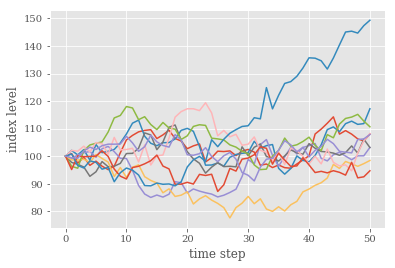

In [70]:
import matplotlib.pyplot as plt
plt.plot(S[:, :10])
plt.grid(True)
plt.xlabel('time step')
plt.ylabel('index level')
# tag: index_paths
# title: The first 10 simulated index level paths

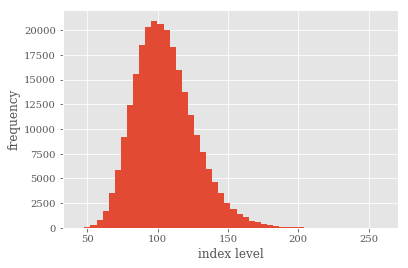

In [71]:
plt.hist(S[-1], bins=50)
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')
# tag: index_histo
# title: Histogram of all simulated end of period index level values

(0, 50000)

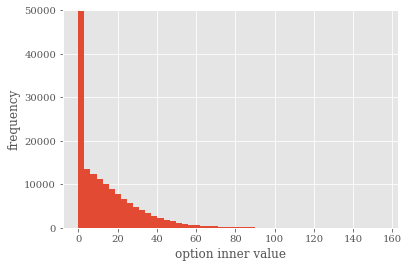

In [72]:
plt.hist(np.maximum(S[-1] - K, 0), bins=50)
plt.grid(True)
plt.xlabel('option inner value')
plt.ylabel('frequency')
plt.ylim(0, 50000)
# tag: option_iv_hist
# title: Histogram of all simulated end of period option inner values

In [38]:
sum(S[-1] < K)

133533

## Technical Analysis

In [73]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web

In [79]:
SPY = web.DataReader('SPY', data_source='google',
                       start='1/1/2000', end='8/8/2017')
SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4000 entries, 2001-09-17 to 2017-08-08
Data columns (total 5 columns):
Open      3980 non-null float64
High      3980 non-null float64
Low       3980 non-null float64
Close     4000 non-null float64
Volume    4000 non-null int64
dtypes: float64(4), int64(1)
memory usage: 187.5 KB


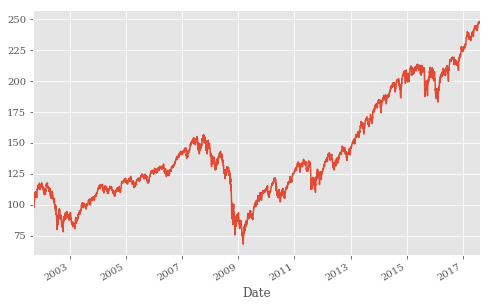

In [80]:
SPY['Close'].plot(grid=True, figsize=(8, 5))
# tag: SPY
# title: Historical levels of the S&P 500 index

In [81]:
SPY['42d'] = np.round(SPY['Close'].rolling(window=42).mean(), 2)
SPY['252d'] = np.round(SPY['Close'].rolling(window=252).mean(), 2)

In [82]:
SPY[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2017-08-02,247.44,244.29,229.25
2017-08-03,246.96,244.36,229.37
2017-08-04,247.41,244.46,229.50
2017-08-07,247.87,244.56,229.62
2017-08-08,247.26,244.64,229.73


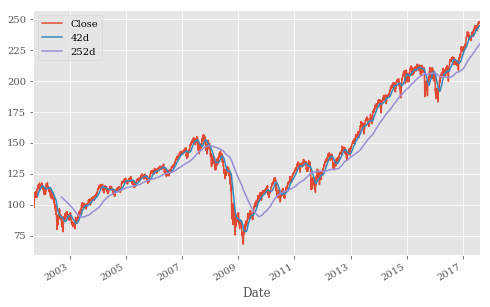

In [83]:
SPY[['Close', '42d', '252d']].plot(grid=True, figsize=(8, 5))
# tag: SPY_trend
# title: The S&P 500 index with 42d and 252d trend lines

In [84]:
SPY['42-252'] = SPY['42d'] - SPY['252d']
SPY['42-252'].tail()

Date
2017-08-02    15.04
2017-08-03    14.99
2017-08-04    14.96
2017-08-07    14.94
2017-08-08    14.91
Name: 42-252, dtype: float64

In [85]:
SPY['42-252'].head()

Date
2001-09-17   NaN
2001-09-18   NaN
2001-09-19   NaN
2001-09-20   NaN
2001-09-21   NaN
Name: 42-252, dtype: float64

In [86]:
SD = 5
SPY['Regime'] = np.where(SPY['42-252'] > SD, 1, 0)
SPY['Regime'] = np.where(SPY['42-252'] < -SD, -1, SPY['Regime'])
SPY['Regime'].value_counts()

 1    2082
 0    1293
-1     625
Name: Regime, dtype: int64

(-1.1, 1.1)

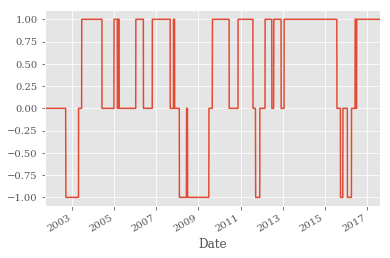

In [87]:
SPY['Regime'].plot(lw=1.5, grid=True)
plt.ylim([-1.1, 1.1])
# tag: SPY_signal
# title: Signal regimes over time

In [88]:
SPY['Market'] = np.log(SPY['Close'] / SPY['Close'].shift(1))

In [89]:
SPY['Strategy'] = SPY['Regime'].shift(1) * SPY['Market']

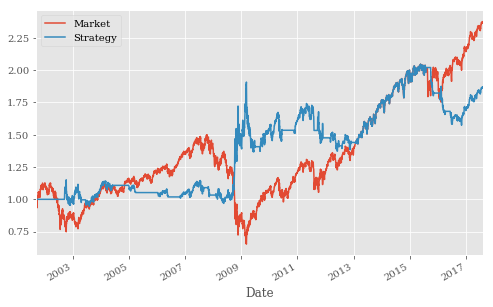

In [90]:
SPY[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True,
                                                    figsize=(8, 5))
# tag: SPY_wealth
# title: The S&P 500 index vs. investor's wealth

## Conclusions

## Further Reading

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>

**Python Training** |
<a href="http://training.tpq.io" target="_blank">Python for Finance University Certificate</a>